In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import normaltest, shapiro, jarque_bera, anderson
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [2]:
df = pd.read_csv('../../../data/data.csv')
print(df.columns)
print(df.info())

Index(['PlayerID', 'Age', 'Gender', 'Location', 'GameGenre', 'PlayTimeHours',
       'InGamePurchases', 'GameDifficulty', 'SessionsPerWeek',
       'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked',
       'EngagementLevel'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSe

In [3]:
X = df.drop(columns=["PlayerID", "EngagementLevel",'Gender', 'Location', 'GameGenre', 'GameDifficulty'])
y = df["EngagementLevel"]

print(X.columns)
print(X.info())


Index(['Age', 'PlayTimeHours', 'InGamePurchases', 'SessionsPerWeek',
       'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        40034 non-null  int64  
 1   PlayTimeHours              40034 non-null  float64
 2   InGamePurchases            40034 non-null  int64  
 3   SessionsPerWeek            40034 non-null  int64  
 4   AvgSessionDurationMinutes  40034 non-null  int64  
 5   PlayerLevel                40034 non-null  int64  
 6   AchievementsUnlocked       40034 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 2.1 MB
None


Accuracy: 89.72%
Mejores parámetros: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'best'}
Accuracy en el conjunto de prueba: 0.9008

=== Mejor modelo (GridSearchCV) ===
Accuracy: 0.8431
F1-score (macro): 0.8356
Matriz de confusión:
[[1730  114  191]
 [ 166 1715  212]
 [ 288  285 3306]]
Accuracy con modelo optimizado: 84.31%


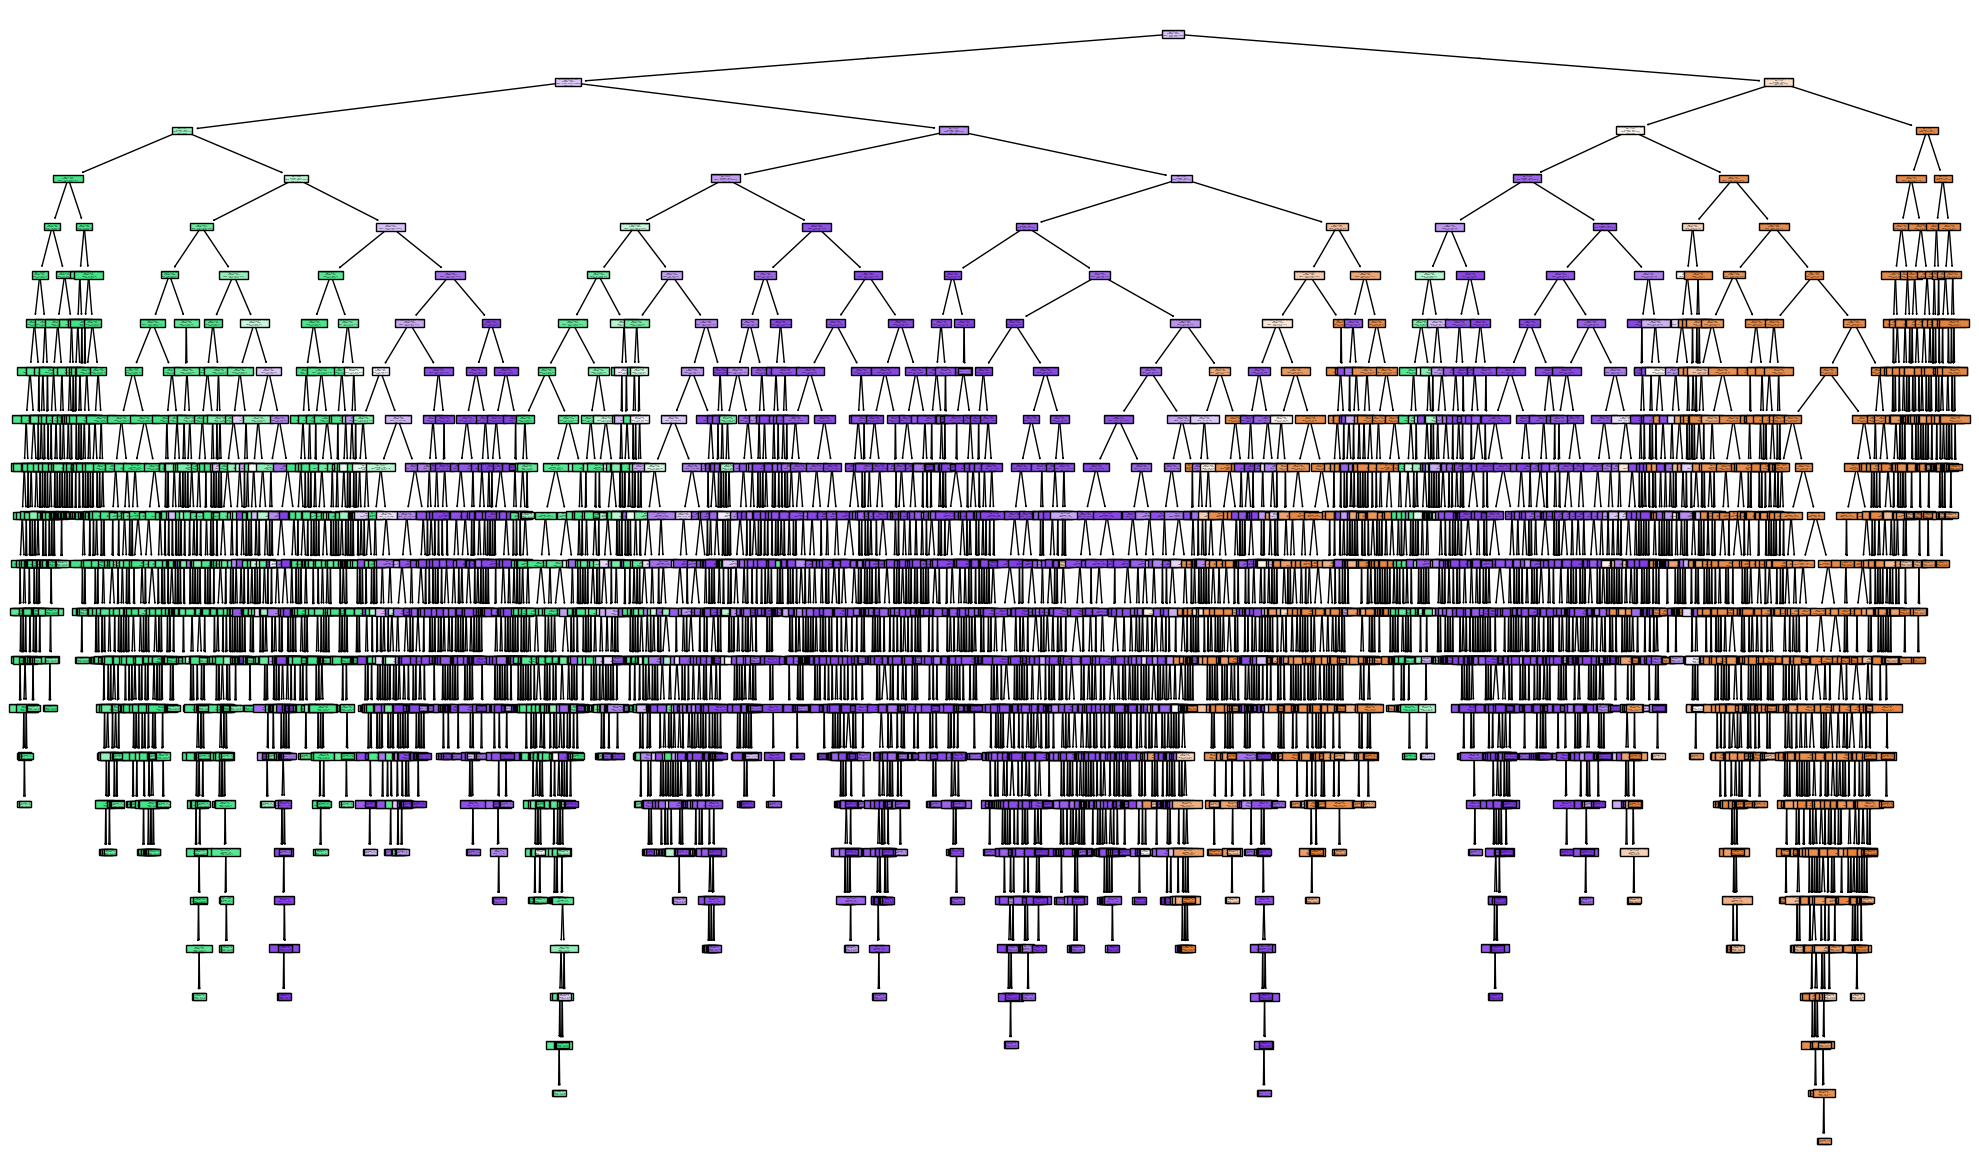

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import tree

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de árbol de decisión
model = DecisionTreeClassifier( criterion='gini',
    max_depth=None,
    min_samples_leaf=5,
    min_samples_split=4,
    splitter='random',
    random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Visualizar el árbol de decisión
plt.figure(figsize=(25, 15))
tree.plot_tree(model, filled=True, feature_names=X.columns, class_names=['Bajo', 'Medio', 'Alto'])

# Crear el clasificador de árbol de decisión
model = DecisionTreeClassifier(random_state=42)

# Definir el grid de parámetros
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best' , 'random']
}

# Crear el GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Ajustar el modelo con los parámetros especificados
grid_search.fit(X_train, y_train)

# Ver los mejores parámetros encontrados
print(f"Mejores parámetros: {grid_search.best_params_}")

# Evaluar el modelo en el conjunto de prueba
accuracy = grid_search.score(X_test, y_test)
print(f"Accuracy en el conjunto de prueba: {accuracy:.4f}")

# Crear el modelo con los mejores parámetros
best_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=None,
    min_samples_leaf=2,
    min_samples_split=2,
    splitter='best',
    random_state=42
)

# Entrenar el modelo
best_model.fit(X_train, y_train)

# Hacer predicciones con el conjunto de prueba
y_pred_best = best_model.predict(X_test)

# Evaluar el modelo optimizado
# ---- Métricas (SOLO 3) ----
acc_best = accuracy_score(y_test, y_pred_best)
f1m_best = f1_score(y_test, y_pred_best, average='macro')
cm_best = confusion_matrix(y_test, y_pred_best)

print("\n=== Mejor modelo (GridSearchCV) ===")
print(f"Accuracy: {acc_best:.4f}")
print(f"F1-score (macro): {f1m_best:.4f}")
print("Matriz de confusión:")
print(cm_best)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Accuracy con modelo optimizado: {accuracy_best * 100:.2f}%')